In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Key idea: sampling hyperboloids in high dimensions can be problematic, since the norm of the spacelike dimensions
# gets very large, and therefore we get overflow errors in the timelike dimension.

# In this notebook, we want to characterize the scaling of the norms of random gaussians in high dimensions so that
# we can adjust for it

/var/folders/ck/0ybgtq694jnd4mbjw_0rm6dh0000gp/T/ipykernel_42661/3326185924.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([np.array(norms)[np.array(dimensions) == dim] for dim in [2, 4, 8, 16, 32, 64, 128]],


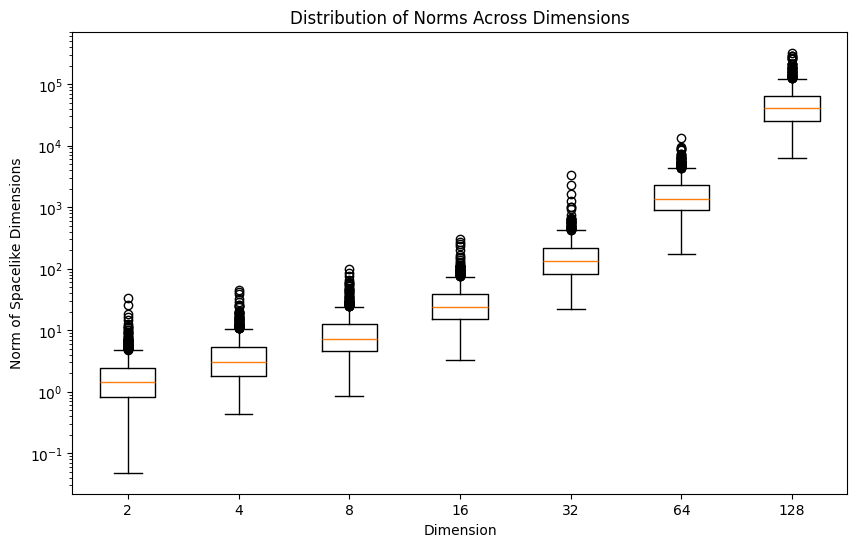

In [9]:
import embedders
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store data
dimensions = []
norms = []

# Sample multiple times for each dimension
n_samples = 1000

for dim in [2, 4, 8, 16, 32, 64, 128]:
    manifold = embedders.manifolds.ProductManifold(signature=[(-1, dim)])
    
    for _ in range(n_samples):
        z = manifold.sample()
        # Calculate the norm of the spacelike dimensions (all but the first)
        norm = torch.norm(z[0, 1:]).item()
        
        dimensions.append(dim)
        norms.append(norm)

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([np.array(norms)[np.array(dimensions) == dim] for dim in [2, 4, 8, 16, 32, 64, 128]],
            labels=[2, 4, 8, 16, 32, 64, 128])
plt.title('Distribution of Norms Across Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Norm of Spacelike Dimensions')
plt.yscale('log')
plt.show()

/var/folders/ck/0ybgtq694jnd4mbjw_0rm6dh0000gp/T/ipykernel_42661/2072041574.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([np.array(norms)[np.array(dimensions) == dim] for dim in [2, 4, 8, 16, 32, 64, 128]],


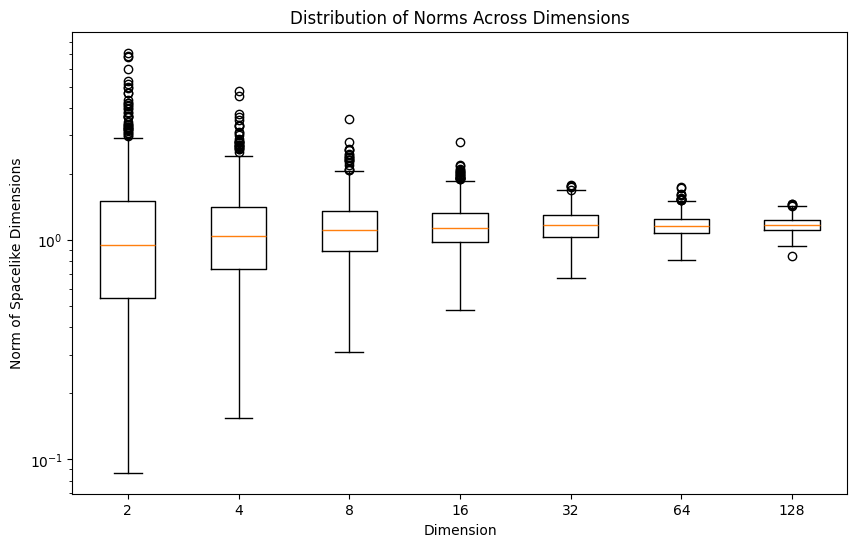

In [20]:
# Ok so we see that on a log-log plot, the norms seem to be exponential or polynomial.

# What if we divide everything by exp(dim)?

# Initialize lists to store data
dimensions = []
norms = []

# Sample multiple times for each dimension
n_samples = 1000

for dim in [2, 4, 8, 16, 32, 64, 128]:
    manifold = embedders.manifolds.ProductManifold(signature=[(-1, dim)])
    
    for _ in range(n_samples):
        cov = torch.eye(dim) / torch.tensor(dim)
        z = manifold.sample(sigma_factorized=[cov])
        # Calculate the norm of the spacelike dimensions (all but the first)
        norm = torch.norm(z[0, 1:]).item()
        
        dimensions.append(dim)
        norms.append(norm)

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([np.array(norms)[np.array(dimensions) == dim] for dim in [2, 4, 8, 16, 32, 64, 128]],
            labels=[2, 4, 8, 16, 32, 64, 128])
plt.title('Distribution of Norms Across Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Norm of Spacelike Dimensions')
plt.yscale('log')
plt.show()